In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

# Import the dataset
data = pd.read_csv('2022-Jun-1.csv')

# Inspect the dataset
print(data.head())
print(data.info())

   t     th
0  1   3.58
1  2   3.68
2  3   3.32
3  4  11.56
4  5   3.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       40 non-null     int64  
 1   th      40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes
None


Number of points n = 40
Mean = 3.73


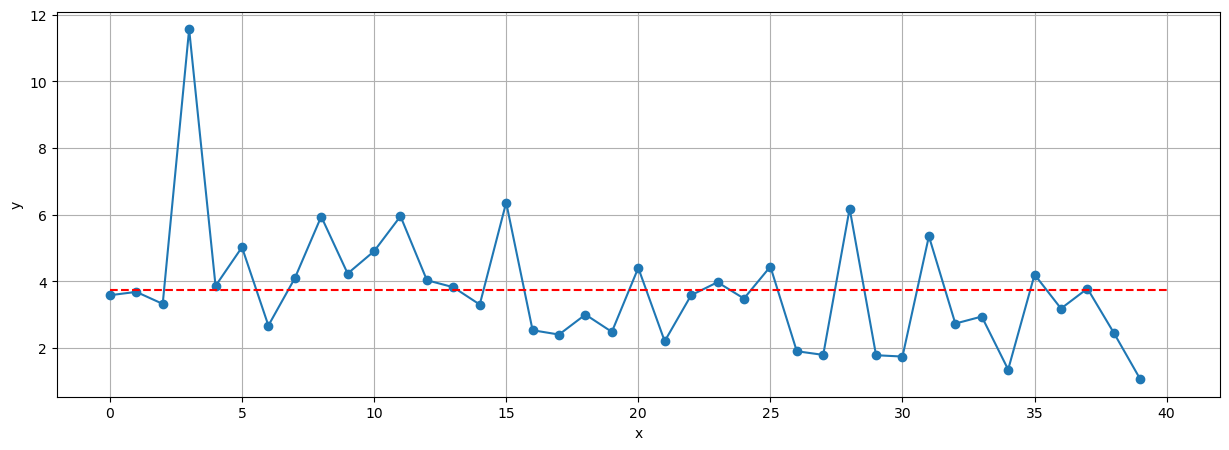

In [2]:
mf.single_ts_plot(data['th'])

In [3]:

import statsmodels.api as sm
data['dummy'] = np.zeros(len(data))
data['dummy'][3] = 1

x = data[['t','dummy']]#se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['th']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
th =  + 4.440 const -0.044 t + 7.294 dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const  4.4401   0.4248  10.4512 1.3592e-12
    t -0.0435   0.0178  -2.4392 1.9636e-02
dummy  7.2940   1.3188   5.5307 2.7139e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.2677 0.5492     0.5248

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS   Adj MS  F-Value    P-Value
Regression  2.0  72.4339  36.2169  22.5373 3.9707e-07
     const  1.0 175.5249 175.5249 109.2268 1.3592e-12
         t  1.0   9.5610   9.5610   5.9497 1.9636e-02
     dummy  1.0  49.1543  49.1543  30.5881 2.7139e-06
     Error 37.0  59.4581   1.6070      NaN        NaN
     Total 39.0 131.8920      NaN      NaN        NaN


c:\Users\alyuk\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Shapiro-Wilk test p-value on the residuals = 0.024


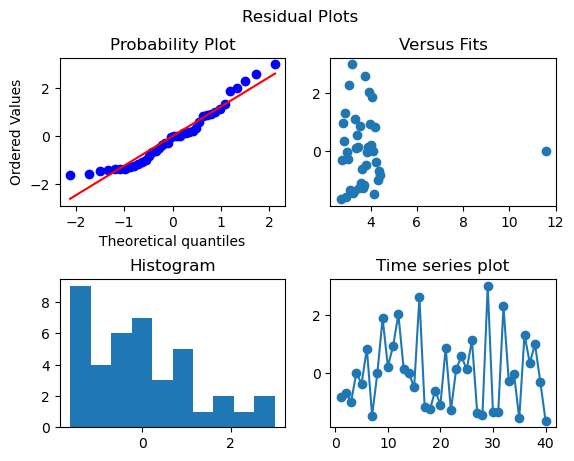

In [4]:
mf.shapirplusresplots(model)

In [5]:
mf.runs(model.resid)

Runs test statistic = -0.583
Runs test p-value = 0.560
Accept H0: the data are random


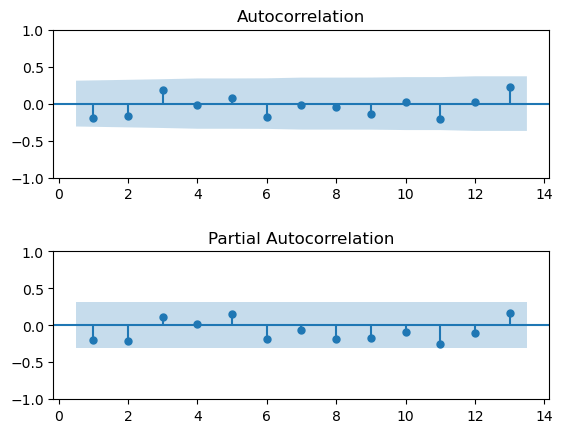

In [6]:
mf.acfpacf(model.resid)

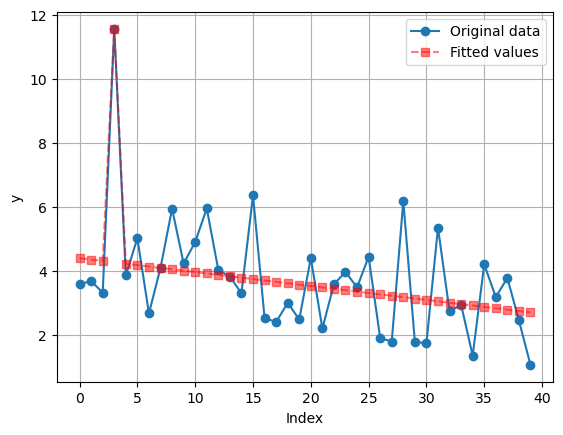

In [7]:
mf.plotyvsfits(y,model)

si può provare a trasformare i dati anche se sembra una cazzata trasformare i dati non stazionari.
quando può avere senso?
Quando vediamo un trend con punti attorno al trend che appaiono SKEWED che si rinconferma nel momento in cui shapiro rifiuta la normalità dei residui su un modello fittato sui dati originali (SKEWED attorno ad un trend significativo)

il Lambda migliore è= 0.076
ma il lambda usato è 0
p-value of the Shapiro-Wilk test: 0.734
box cox succeeded :)


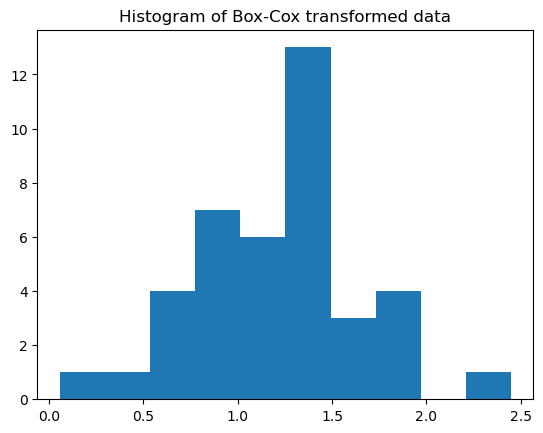

In [8]:
[data_norm,lmbda]=mf.boxcox(data,'th')

Number of points n = 40
Mean = 1.21


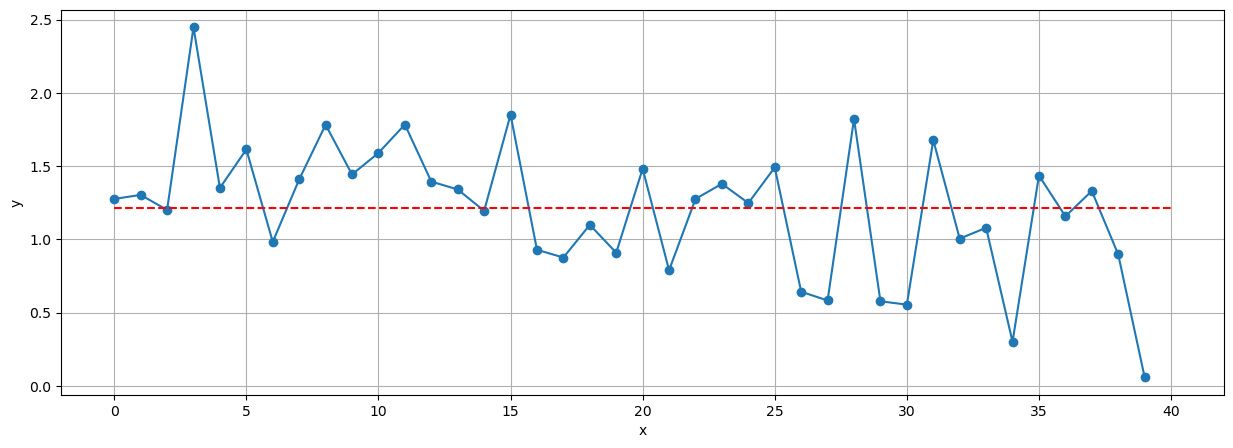

In [9]:
mf.single_ts_plot(data_norm)

In [10]:
import statsmodels.api as sm

x = data['t']#se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data_norm
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
y =  + 1.602 const -0.019 t

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const  1.6016   0.1323  12.1090 1.2961e-14
    t -0.0189   0.0056  -3.3676 1.7476e-03

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.4104 0.2298     0.2096

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  1.0  1.9105  1.9105  11.3408 1.7476e-03
     const  1.0 24.7011 24.7011 146.6291 1.2961e-14
         t  1.0  1.9105  1.9105  11.3408 1.7476e-03
     Error 38.0  6.4015  0.1685      NaN        NaN
     Total 39.0  8.3119     NaN      NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.698


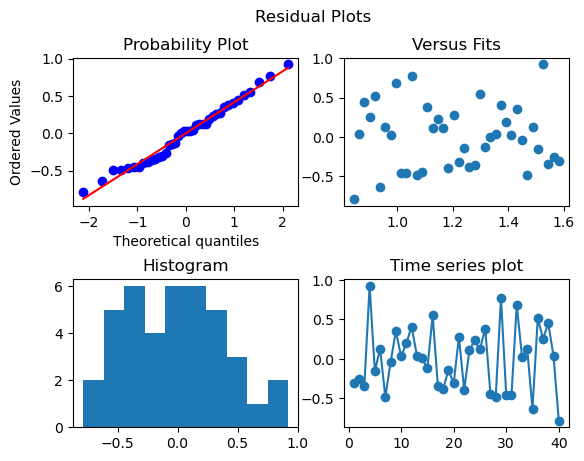

In [11]:
mf.shapirplusresplots(model)

In [12]:
mf.runs(model.resid)

Runs test statistic = -0.583
Runs test p-value = 0.560
Accept H0: the data are random


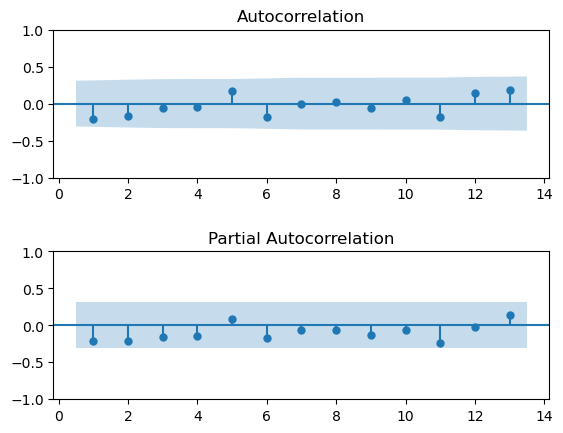

In [13]:
mf.acfpacf(model.resid)

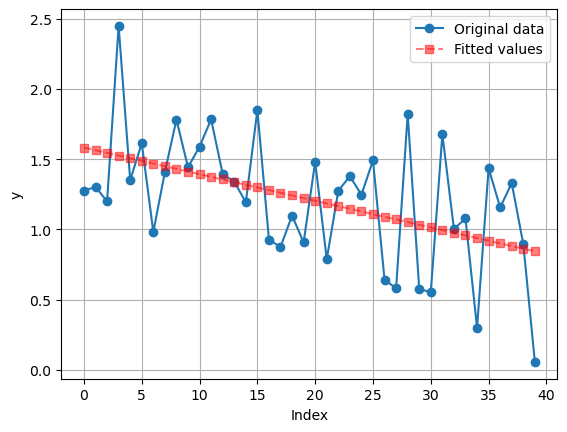

In [14]:
mf.plotyvsfits(y,model)

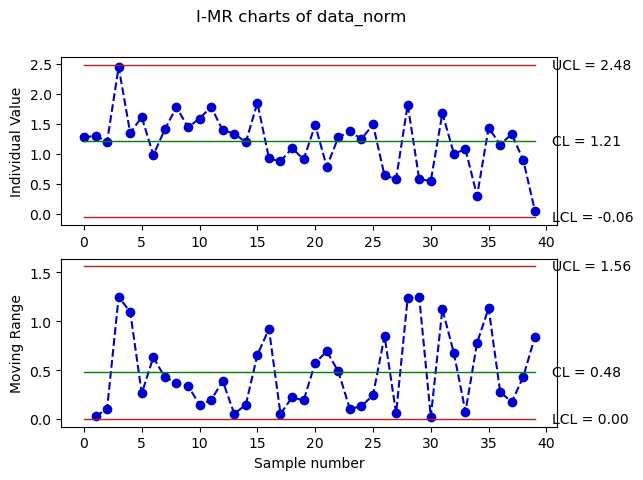

In [15]:
df_norm = pd.DataFrame({'data_norm': data_norm})
data_IMR = qda.ControlCharts.IMR(df_norm,'data_norm') 


U𝐶𝐿 =𝑏0+𝑏1𝑡+𝑧𝛼/2*MRbar/d2(2)

CL=𝑏0+𝑏1𝑡

LCL=𝑏0+𝑏1𝑡-𝑧𝛼/2*MRbar/d2(2)


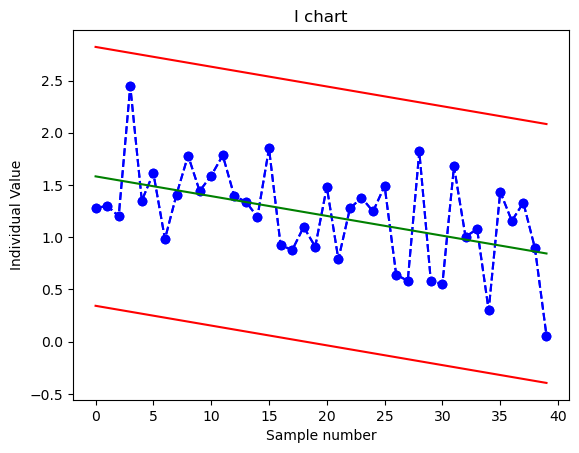

In [16]:
alpha=1/300
[data_IMR,df_res]=mf.IMR_TrendCC(data_IMR,model,'no',alpha)
#dati non devono essere positivi perchè applico trasformazione logaritmica

Using the control chart designed at point a), determine if the new observations in Table 2 are in
control or not.  

In [17]:
data_PH2_dictionary = {'t': [41,42,43,44,45],
        'th': [3.28,3.01,2.25,1.11,0.86],
       }
 
data_ph2 = pd.DataFrame(data_PH2_dictionary)
data_ph2.head()


,t,th
0,41,3.28
1,42,3.01
2,43,2.25
3,44,1.11
4,45,0.86


In [18]:
#trasformo i dati di phase2
data_norm_ph2= stats.boxcox(data_ph2['th'], lmbda=0)

In [19]:
#costruisco il dataframe da cui calcolare le prediction del modello per questi dati
df_ph2 = pd.DataFrame({'ones': np.ones(len(data_norm_ph2))})
df_ph2['t']=data_ph2['t']

In [20]:
predictions_ph2=model.predict(df_ph2)
residuals_ph2=data_norm_ph2-predictions_ph2 #ottengo i residui per i miei nuovi dati

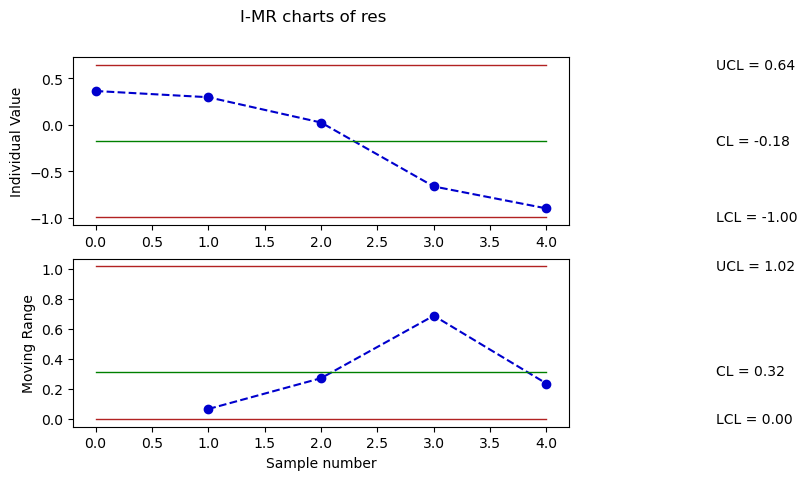

In [21]:
#il controllo può avvenire con uno SCC guardando gli individual (è equivalente)

df_SCC = pd.DataFrame({'res': residuals_ph2}) #lo chiamo direttamente df_SCC
k=stats.norm.ppf(1-alpha/2)
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res',k)

In [22]:
#Utilizzando il Trend CC diciamo posso fare il controllo anche così:
#costruiamo colonne UCL e LCL
#recupera differenza tra CL e LCL e CL e UCL che è costante dall'IMR df risultante dal Trend CC:
span=1.239216
#data_norm_ph2= stats.boxcox(data_ph2['th'], lmbda=0)
dati_UCL=model.predict(df_ph2)+span
dati_LCL=model.predict(df_ph2)-span
mf.checkOOC(data_norm_ph2,dati_LCL,dati_UCL)

#sono tutti IC questi 5 sample di phase2!

0    True
1    True
2    True
3    True
4    True
dtype: bool

knowing that parts with a metal coating thickness lower than 1.5 µm are not conforming, use the 
model fitted at point a) to determine the time (in hours) after which the probability of producing non
conforming parts is at least 10%.

In [25]:
non_conf=1.5
non_conf_ln=np.log(1.5)
print(non_conf_ln)

0.4054651081081644


In [30]:
df_test=pd.DataFrame({'ones': np.ones(100)})
df_test['t']=np.arange(1,101,1)

,ones,t
95,1.0,96
96,1.0,97
97,1.0,98
98,1.0,99
99,1.0,100


In [34]:
model.mse_resid

0.16845959659250723

In [35]:
mean_t=model.predict(df_test)
print(mean_t)
prob=np.zeros(100)
for t in range(1,100):
    prob[t]=stats.norm.cdf(0.405,loc=mean_t[t-1],scale=np.sqrt(model.mse_resid))
    if(prob[t])>=0.1:
        print(t)

#the first t is 36, so it's the answer

0     1.5827
1     1.5637
2     1.5448
3     1.5259
4     1.5069
       ...  
95   -0.2159
96   -0.2348
97   -0.2538
98   -0.2727
99   -0.2916
Length: 100, dtype: float64
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
